<a id='ReturntoTop'></a>


<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>NLP with Steam Video Game Reviews</h1>
      <h3>Notebook 3 - Exploratory Modeling </h3>
      <p>Author: David Lappin | Date: 5/12/2023 - */**/2023 </p>
    </div>
    <img src="bannerphoto/banner.jpg" alt="your-image-description" style="height:225px; margin-left:50px; border: 8px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose

In our last notebook, we will explore various modeling techniques that are well suited for binary classification problems such as sentiment analysis. As mentioned prior, these modeling techniques often perform variable depending on the size of the data set. With a small data set we do uncover some issues while training these models that may or may not have occurred with a larger dataset. therefore it is important to remember that the intention of this project was not to create the perfect model, but to explore various techniques and highlight ways to analyze a models performance. 

**In this notebook we will:**
- Create and analyze a logistic regression model
- Create and analyze a Known Nearest Neighbors model (KNN)
- Create and analyze a Decision Tree model
- Create and analyze a Convolutional Neural Network model (CNN)
- Summarize the models performance
- Discuss theoretical next steps and summary information


# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Logistic Regression Model](#3)

[Known Nearest Neighbor (KNN) Model](#4)

[Decision Tree Model](#5)

[Convolutional Neural Network (CNN) Model](#6)

[Models Summary](#7)

[Summary and Next Steps](#8)


# Packages Import
<a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**plot_tree** - visualization tool for Decision tree models 

**Visual Keras** - visualization tool for CNN models

------------------------------------------------------------------------------------------------------------

**train_test_split** - used to split data set into training/validation/and testing sets

**Standard Scaler** - used for scaling data

**confusion matrix** - assist in creation of confusion matrix visualizations for model performance evaluation

**classification report** - creation of classification report for model performance metrics such as f1-score, precision, recall

---------------------------------------------------------------------------------------------------------

**Logistic regression** - sklearns logistic regression model

**KNeighborsClassifier** - sklearns KNN model

**DecisionTreeClassifier** - sklearns Decision Tree model

**tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Sequential** - imports tensorflow sequential model for the compilation of CNN layers

**layers (Conv1D, GlobalMaxPOoling1D, Dense)** - Different CNN model layers in tf

----------------------------------------------------------------------------------------------------------

**Pickle** - used to save models to .pkl file extension for loading in later use

**Warnings** - remove various warnings from modeling to reduce output space



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk_metrics
from sklearn.tree import plot_tree
import visualkeras

#processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score


#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense

#misc
import pickle
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter out Warnings 
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Data Import
[Return to Top](#ReturntoTop)
<a id='2'></a>

Import the reviews csv and explore some of the data within:

In [2]:
#import data

train_df = pd.read_csv('data/train_df.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Columns: 1046 entries, user_suggestion to yu
dtypes: int64(1046)
memory usage: 84.5 MB


Data set is the same dimensions as before. Let's just look at the first few rows:

In [3]:
train_df.head(5)

,user_suggestion,abilities,ability,able,absolute,absolutely,access,account,across,action,...,wrong,ww,xp,yeah,year,years,yes,yet,youtube,yu
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Everything looks good we can move on to splitting the training set into training and validation data and then begin with some baseline models:

# Logistic Regression
<a id='3'></a>
[Return to Top](#ReturntoTop)

Lets start by running a classic and simpler model. Logistic regression is well suited for binary classification problems such as sentiment analysis and will be a simple and computationally efficient method to start off with. We will split the data and then start.

In [4]:
# store data in X and y

#all rows or tokens not including the target variable 
X = train_df.loc[:, train_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y = train_df['user_suggestion']

In [5]:
#Split out 20 percent of the data to validation set and maintain the rest in the train set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = train_df['user_suggestion'], random_state=7)

We can confirm once again that the data was stratified correctly:

In [6]:
#unsplit data

print(f"The negative to positive ratio for the unsplit data is: {round((len(train_df['user_suggestion']) - train_df['user_suggestion'].sum()) / train_df['user_suggestion'].sum(), 5)}")
print('\n')

#train set split

print(f"The negative to positive ratio for the train split is: {round((len(y_train) - y_train.sum()) / y_train.sum(), 5)}") 
print('\n')

#test set split

print(f"The negative to positive ratio for the test split is: {round((len(y_val) - y_val.sum()) / y_val.sum(), 5)}") 


The negative to positive ratio for the unsplit data is: 0.76136


The negative to positive ratio for the train split is: 0.76139


The negative to positive ratio for the test split is: 0.76123


### Observations:

Looks like everything worked and the ratio of positive to negative reviews has been preserved in both the training and the validation splits. 

Let's instantiate and split our first model:

**Note:** We will start with a relatively low max iteration value and we can increase this with further optimization in the future if desired.

In [7]:
# Instantiate a model
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10) 

#Fit the model
logreg.fit(X_train, y_train)
    
# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Validation score: {logreg.score(X_val, y_val)}")

Train score: 0.8367780796031652
Validation score: 0.8238072744449693


### Observations

With a pretty simple model we were able to achieve pretty decent results based on the accuracy (83%) and the validation accuracy (82%). There is limited overfitting between the training and validation. We can optimize a bit further here to find the ideal `max_iter` value to optimize convergence in the model. Lets test different values between 1 and 100:

In [8]:
#determine optimal value for max_iter. Note this may take a moment to run

train_acc = []
val_acc = []

for i in np.arange(0, 100, 2):

# Fitting a model
    logreg = LogisticRegression(solver = 'lbfgs', max_iter = i) 
    logreg.fit(X_train, y_train)
    
    train_acc.append(logreg.score(X_train, y_train))
    val_acc.append(logreg.score(X_val, y_val))

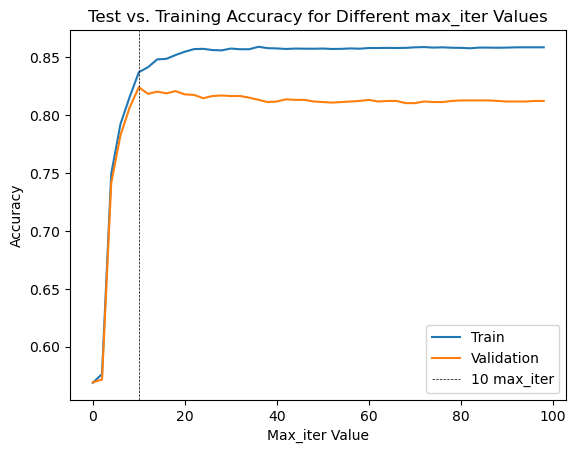

In [9]:
#plot the testing accuracies for the different max_iter values

xvals = np.arange(0, 100, 2) #original range of max_iter values

#plot
plt.figure()
plt.plot(xvals, train_acc, label = 'Train')
plt.plot(xvals, val_acc, label = 'Validation')
plt.axvline(10, color = 'black', label = '10 max_iter', linewidth = 0.5, linestyle = '--')
plt.xlabel('Max_iter Value')
plt.ylabel('Accuracy')
plt.title('Test vs. Training Accuracy for Different max_iter Values')
plt.legend() 
plt.show()

### Observations:
Based on the graph above, it looks like we actually got lucky with our initial `max_iter` vlaue of 10. Beyond this point, we can see there is a slight increase in the training accuracy, but the validation accuracy ceases to improve leading our model to be slightly overfit. To limit overfitting we can leave the `max_iter` value at 10 for our baseline model. As a last step for now we can look at how out model performs on the test data we sectioned off prior:

In [10]:
test_df = pd.read_csv('data/test_df.csv')

In [11]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

In [13]:
y_prediction = logreg.predict(X_test)

#generate the classification report
class_rep = classification_report(y_test, y_prediction)

#print the classification report
print("Classification Report:")
print(class_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       509
           1       0.80      0.83      0.81       668

    accuracy                           0.79      1177
   macro avg       0.78      0.78      0.78      1177
weighted avg       0.78      0.79      0.78      1177



This would be a good time to explain what some of these metrics mean:


**Precision** 
- Answers the question: "Of all instances predicted as positive, how many where actually positive?" 
- It is the measure of the accuracy of the positive predictions
- High precision means that when the model predicts a positive class it is likely to be right

**Recall** 
- Answers the question: "Of all the positive instances in the data set, how many did the model correctly identify and predict positive?"
- High recall means the model is effective at predicting positive instances but at the cost of potentially creating false positives

**f1-score** 
- Is the harmonic mean between precision and recall
- Used to evaluate the models performance and balance both precision and recall metrics
- Ranges from 0 - 1 with 1 being the best.
- Best used metric to identify the overall performance in the model


Given our results, we can see that our logistic regression model has a fairly decent accuracy (0.79%), but it also has a decent weighted average f1-score (0.78). We can also look at a confusion matrix to visualize these results a bit better:

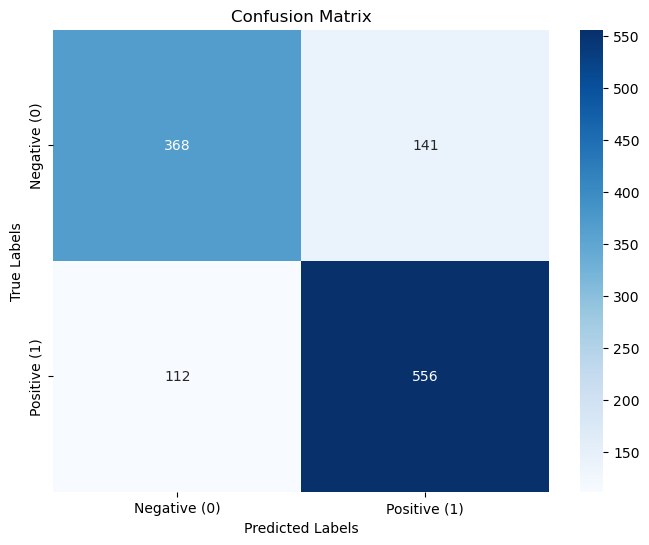

In [14]:
#create confusion matrix
cm_df_logreg = confusion_matrix(y_test, y_prediction)

#define class names 
class_names = ['Negative (0)', 'Positive (1)']

#create heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:
We can see how are model is predicting on the new data in the confusion matrix. Here we can see that there are slightly more false positives indicating that the model is more likely to predict positive sentiment. We expected this from the classification report given the slightly higher recall value.

This is a pretty decent start. Without optimizing further, we can create some other models and see how they compare. Let's save the model and then try looking at Known Nearest Neighbors (KNN) models:

In [13]:
#save baseline for potential later use 
#filepath = "models/logreg_baseline.pkl"

# save model
#pickle.dump(logreg, open(filepath, "wb"))

# Known Nearest Neighbors (KNN)
<a id='4'></a>
[Return to Top](#ReturntoTop)

Lets move on to a slightly more complicated model. KNN a another model that is well suited for binary classification problems such as sentiment analysis. At a high level, KNN models use proximity of a defined number of data points to assist in classifying points. This can be a really powerful model but can also be computationally expensive depending on the number of points (or neighbors). Additionally, the size of the database can be a huge factor in the computational power required because the model measures the distance between a point and all other points in the dataset in order to determine closest neighbors. Lets explore a bit below:

In [15]:
# reload in the data

#all rows or tokens not including the target variable 
X = train_df.loc[:, train_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y = train_df['user_suggestion']

In [16]:
#Split data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = train_df['user_suggestion'], random_state=7)

KNN is a distance based model and therefore we will scale the data to help create a more uniform contribution from each feature:

In [17]:
#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [18]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier() #for now we are goin to leave value unspecified
KNN_model.fit(X_train, y_train)

# Score the model on the test set
print("Number of neighbors:", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train, y_train))
print("Validation accuracy:", KNN_model.score(X_val, y_val))

Number of neighbors: 5
Train accuracy: 0.7190268099681115
Validation accuracy: 0.6131317902692489


### Observations:
With a default K value equal to 5, we achieved a training accuracy of 71% and a validation accuracy of 61%. This model is a bit overfit and slightly less effective than our baseline logistic regression model. Similar to the logreg model, we can optimize the k-value hyperparameter and see if there is a more optimal value:

In [18]:
# Loop through K val terms to determine the optimal K value


neighbors = range(1, 100, 5)  # step by 5

train_acc = []
val_acc = []

for n in neighbors: 
    
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    #Score the model on the test set
    train_accuracy = KNN_model.score(X_train, y_train)
    val_accuracy = KNN_model.score(X_val, y_val)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)


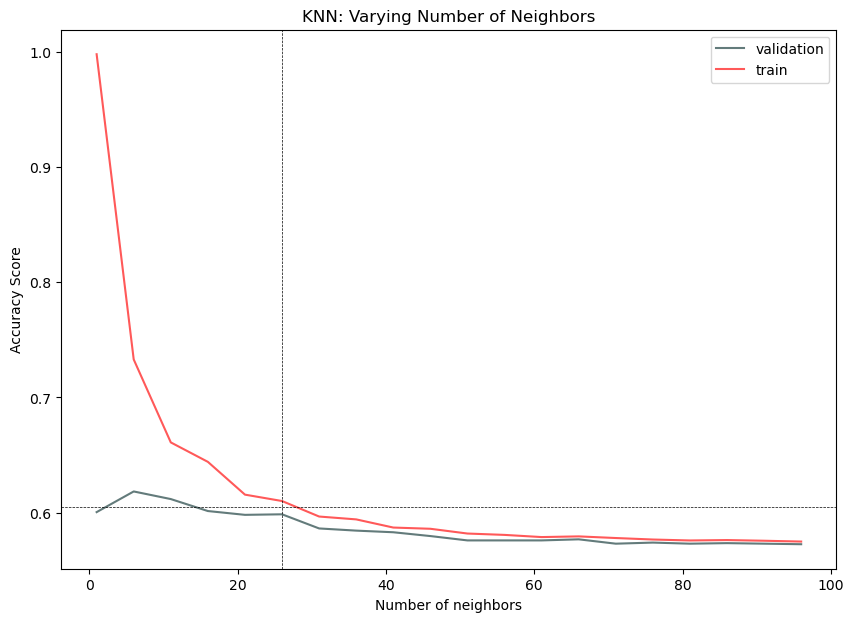

In [19]:
#plot the results 
plt.figure(figsize=(10, 7))
plt.plot(neighbors, val_acc, color="darkslategray", alpha = .75, label="validation")
plt.plot(neighbors, train_acc, color="red", alpha = .65, label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")

plt.axvline(26, linestyle = '--', color = "black", linewidth = .5)
plt.axhline(0.605, linestyle = '--', color = "black", linewidth = .5)

plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

### Observations:

Based on this, there are a few options for the `n_neighbors` value but we will select 26. At this value, we limit a considerable amount of overfitting. Lets re-run the model with this value, try the model with our test set, and save or KNN baseline.

In [57]:
%%time
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors = 26) #for now we are goin to leave value unspecified
KNN_model.fit(X_train, y_train)

# Score the model on the test set
print("Number of neighbors:", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train, y_train))
print("Validation accuracy:", KNN_model.score(X_val, y_val))

Number of neighbors: 26
Train accuracy: 0.6563127435927719
Validation accuracy: 0.6258856872933396
Wall time: 2.25 s


We can then load in the test set and see how the model performs on unseen data:

In [20]:
#reload the test data

test_df = pd.read_csv('data/test_df.csv')

In [21]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

We can now make our predictions:

In [22]:
y_prediction = KNN_model.predict(X_test)

#generate classification report
class_rep = classification_report(y_test, y_prediction)

#print classification report
print("Classification Report:")
print(class_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       509
           1       0.57      1.00      0.72       668

    accuracy                           0.57      1177
   macro avg       0.45      0.50      0.36      1177
weighted avg       0.47      0.57      0.41      1177



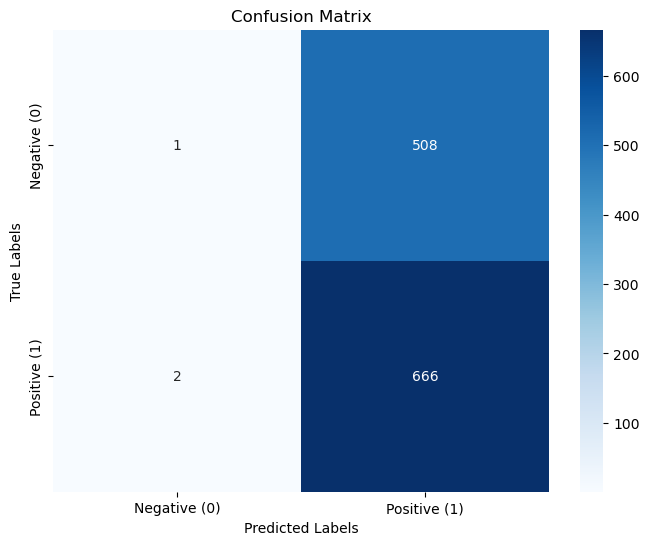

In [23]:
#create confusion matrix
cm_df_KNN = confusion_matrix(y_test, y_prediction)

#define class names 
class_names = ['Negative (0)', 'Positive (1)']

#create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:
Our KNN model achieved a training accuracy of (61%), a validation accuracy of (59%), and testing accuracy (57%). This isn't as good as the logistic regression model, but on the surface it does not seem so bad. If you look a bit closer into some of our other metrics however, you will see that the model is actually not performing very well at all. The classification report identifies a very low (0.41) f1-score, and the confusion matrix highlights a major problem. This model is predicting every review as positive. The accuracy score here is only a reflection of the class imbalance where slightly over half of the reviews are positive. 

There are potentially other things to try and optimize here, but for now lets move on and try a new model.

In [24]:
#save baseline for potential later use 
#filepath = "models/KNN_baseline.pkl"

# save model
#pickle.dump(KNN_model, open(filepath, "wb"))

# Decision Trees
<a id='5'></a>
[Return to Top](#ReturntoTop)

Decision Trees are another model that is well suited for binary classification problems such as sentiment analysis. They are relatively simple and easy to interpret. These models are created by multiple decision rules that sort and split data to ultimately create a prediction or outcome. We can set up our data and model below. 

Note: Since decision trees are not influenced by the scale of the features, we do not need to scale the data in this case.

In [51]:
# reload in the data

#all rows or tokens not including the target variable 
X = train_df.loc[:, train_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y = train_df['user_suggestion']

In [52]:
#Split data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = train_df['user_suggestion'], random_state=7)

Let's instantiate and run a model with default values. We may get some funky values at first but let's see:

In [53]:
#Fit to the training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

print(f"Train accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"Test accuracy is:  {DT_model.score(X_val,y_val)}")

Train accuracy is:  0.9979922050312979
Test accuracy is:  0.6528105810108644


Note that in this case the model is extremely overfit. The reason is because we let the max_depth parameter unbounded. When unbounded it will fit perfectly until it has perfectly classified the training data. Unfortunately, this does not generalize well to the testing data (or any new data).

Similar to KNN, lets loop through various max_depth values and determine and optimal value.

In [28]:
#create lists for scoring
train_acc = []
val_acc = []

#set the maximum value for max_depth
depth_range = 20

# loop through the max depth values
for max_depth in range(1, depth_range):
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    
    # scoring
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    train_acc.append(train_score)
    val_acc.append(val_score)
    

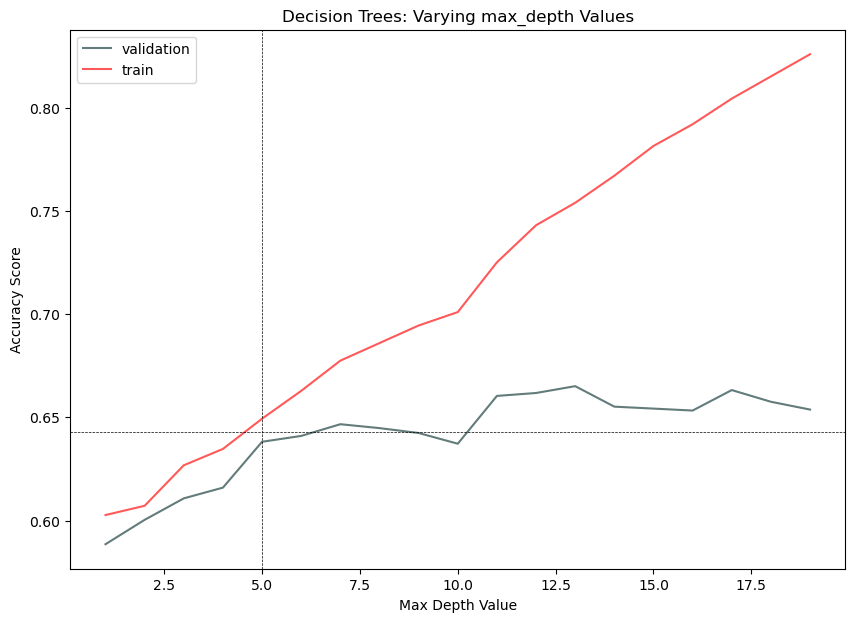

In [29]:
#plot training and test acc for whole dataframe

x_range = np.arange(1, 20, 1)

plt.figure(figsize=(10, 7))
plt.plot(x_range, val_acc, color = "darkslategray", alpha = .75, label="validation")
plt.plot(x_range, train_acc, color = "red", alpha = .65, label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Max Depth Value")

plt.axvline(5, linestyle = '--', color = "black", linewidth = 0.5)
plt.axhline(0.643, linestyle = '--', color = "black", linewidth = 0.5)

plt.title('Decision Trees: Varying max_depth Values')
plt.legend()
plt.show()

### Observations:

We can see here that the model begins to rapidly overfit past a max_depth value of 5. Lets re-run the model and specify a max_depth value of 5 and then we can visualize the tree itself:

In [54]:
#Fit to the training data
DT_model = DecisionTreeClassifier(max_depth = 5)
DT_model.fit(X_train, y_train)

print(f"Train accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"Test accuracy is:  {DT_model.score(X_val,y_val)}")

Train accuracy is:  0.649344513995512
Test accuracy is:  0.6381672177609825


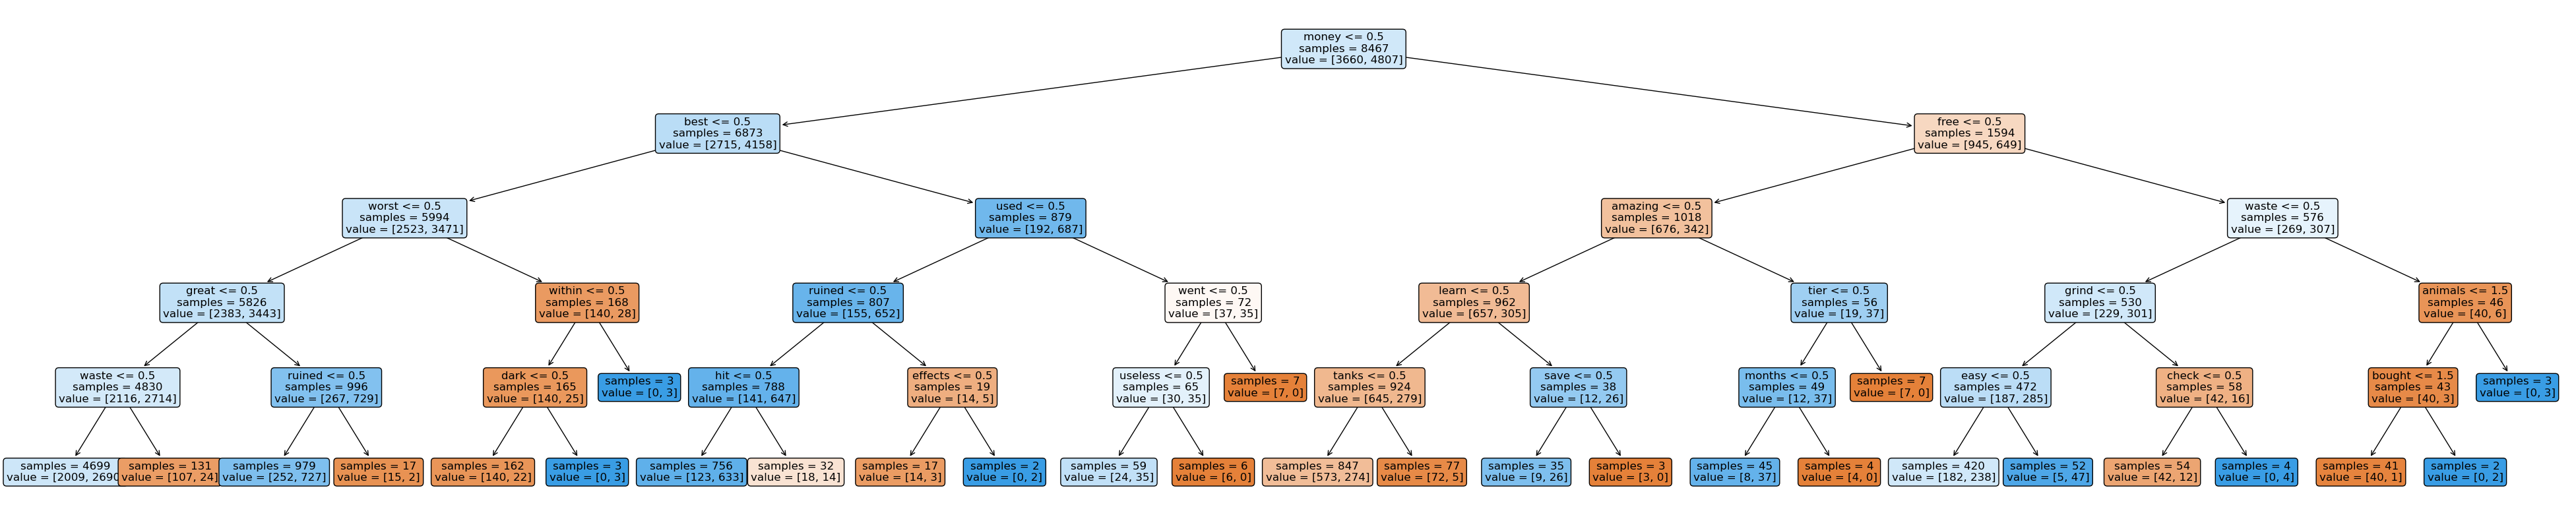

In [55]:
#plot dimensions
fig, ax = plt.subplots(figsize=(50,10))

#plot attributes
plot_tree(DT_model,
          feature_names=X_train.columns,
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

### Observations
While it may be difficult to read in the notebook, the visual above could be exported and inspected to see how some of the decisions in our model were made. One simple thing we can note is that there are 5 "decision" points as specified by our max depth values. Let's test the model against our test data and look a bit deeper into the performance metrics:

In [47]:
#reload the test data

test_df = pd.read_csv('data/test_df.csv')

In [48]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

Now we can predict:

In [49]:
y_prediction = DT_model.predict(X_test)

#generate the classification report
class_rep = classification_report(y_test, y_prediction)

#print the classification report
print("Classification Report:")
print(class_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.17      0.26       509
           1       0.59      0.91      0.71       668

    accuracy                           0.59      1177
   macro avg       0.59      0.54      0.49      1177
weighted avg       0.59      0.59      0.52      1177



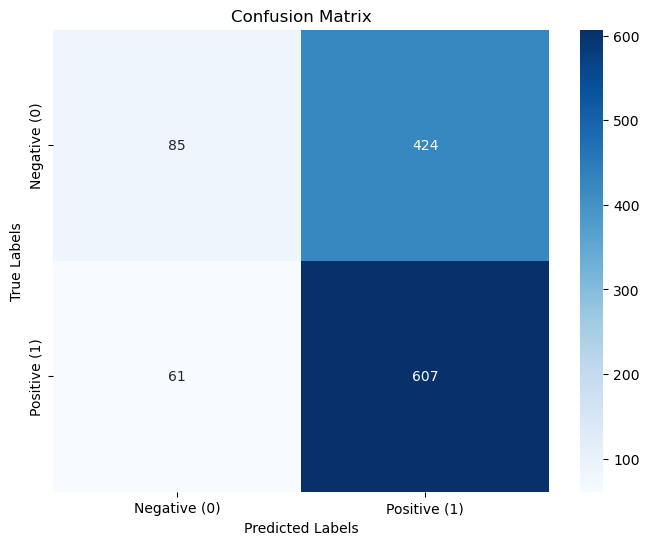

In [50]:
#create confusion matrix
cm_df_DT = confusion_matrix(y_test, y_prediction)

# define class names 
class_names = ['Negative (0)', 'Positive (1)']

#create a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_DT, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:

So not as bad as the KNN model, but it is still under performing and heavily biased toward positive predictions. It is very possible that the class imbalance, given the small size of the data set is really influencing our models results. We will not make any changes in this notebook, but in the future we may need to adjust the data to either up sample the negative reviews or down sample the positive reviews. 

Let's save the model and then move on to our last model. We can then compare our baseline results:

In [32]:
#save baseline for potential later use 
#filepath = "models/DT_baseline.pkl"

# save model
#pickle.dump(DT_model, open(filepath, "wb"))

# Convolutional Neural Networks (CNN):
<a id='6'></a>
[Return to Top](#ReturntoTop)

CNN models can be particularly effective when it comes to classification problems and have a variety of applications. CNNs are very good at detecting patterns in the data and this can be applied to text data as well. These models are scalable and can accommodate varying text sizes. We will start with a basic CNN below and can expand on the model's layers going forward.

First we will re-load and split the data:

In [101]:
# reload in the data

#all rows or tokens not including the target variable 
X = train_df.loc[:, train_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y = train_df['user_suggestion']

In [102]:
#Split data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = train_df['user_suggestion'], random_state=7)

In [103]:
# convert the data to tensors

X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)
X_val_tensor = tf.convert_to_tensor(X_val)
y_val_tensor = tf.convert_to_tensor(y_val)

#### Model Layers and Parameters Explanation 

**Dense Layers** - Fully connected layer connecting each neuron from the previous layer with the current layer
- Relu Activation:
- Sigmoid Activation


**Batch Normalization** - Batch normalization normalizes the inputs of each layer in the network such that the each input has a similar distribution of values. This allows the network as a whole to learn based on simlar input values and reduces the chance of bias. This helps the model to learn faster and more accurately, as well as increases the over-all stability of the model. Batch normalization, while not specifically a regularization technique, does act in a way that ultimately helps to prevent overfitting and generalization.


**Dropout** - Drop out is a regularization technique that randomly deactivates neurons in the network by a pre-determined amount. By randomly dropping neurons, it forces the model to generalize better by reducing the chances it will rely too heavily on one neuron. This allows the model to train in a more uniform and distributed way and as a result, reduces overfitting.

**Compile** - Configures model based on a variety of arguments. Some of them are included below:
- Optimizer: Determines how the models weights are updated based on computed gradients in training.
    - Adam optimizer is a common and high performing gradient decent method (default learning rate = 0.001)
- Loss Function - Calculates loss between predicted and true output
    - For binary classification, the "binary_crossentropy" loss is commonly used. For multi-class classification, "categorical_crossentropy" or "sparse_categorical_crossentropy" is typically used.
- Metrics - Evaluates the performance of the model during training and testing

In [104]:
#feature dimensions for model inputs
input_shape  = X.shape[1]

#Instantiate Sequential model
CNN_model = tf.keras.Sequential()

#define the CNN model
CNN_model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(input_shape,)))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=128, activation='relu'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#compile the model
CNN_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

In [105]:
#look at the compiled model summary 

CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               267776    
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_22 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 128)              

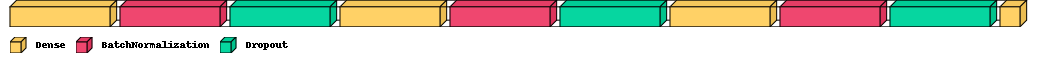

In [106]:
#visualize the model summary with VisualKeras

visualkeras.layered_view(CNN_model, legend = True, draw_volume = True, scale_xy=3, scale_z=3, max_z=100)


In [107]:
#fit model for 10 epochs

epochs = 10

#save history  and fit the model to the train set and validate on the val set

history = CNN_model.fit(X_train_tensor, y_train_tensor, 
                        epochs=10, 
                        batch_size=32,
                        validation_data=(X_val_tensor, y_val_tensor))

Epoch 1/10
265/265 [==============================] - 3s 5ms/step - loss: 0.6105 - accuracy: 0.6935 - val_loss: 0.4686 - val_accuracy: 0.7756
Epoch 2/10
265/265 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8218 - val_loss: 0.4116 - val_accuracy: 0.8200
Epoch 3/10
265/265 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8648 - val_loss: 0.4366 - val_accuracy: 0.8167
Epoch 4/10
265/265 [==============================] - 1s 4ms/step - loss: 0.2450 - accuracy: 0.8985 - val_loss: 0.4449 - val_accuracy: 0.8224
Epoch 5/10
265/265 [==============================] - 1s 4ms/step - loss: 0.1806 - accuracy: 0.9285 - val_loss: 0.5117 - val_accuracy: 0.8120
Epoch 6/10
265/265 [==============================] - 1s 4ms/step - loss: 0.1443 - accuracy: 0.9450 - val_loss: 0.5481 - val_accuracy: 0.8068
Epoch 7/10
265/265 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9536 - val_loss: 0.5929 - val_accuracy: 0.7950
Epoch 

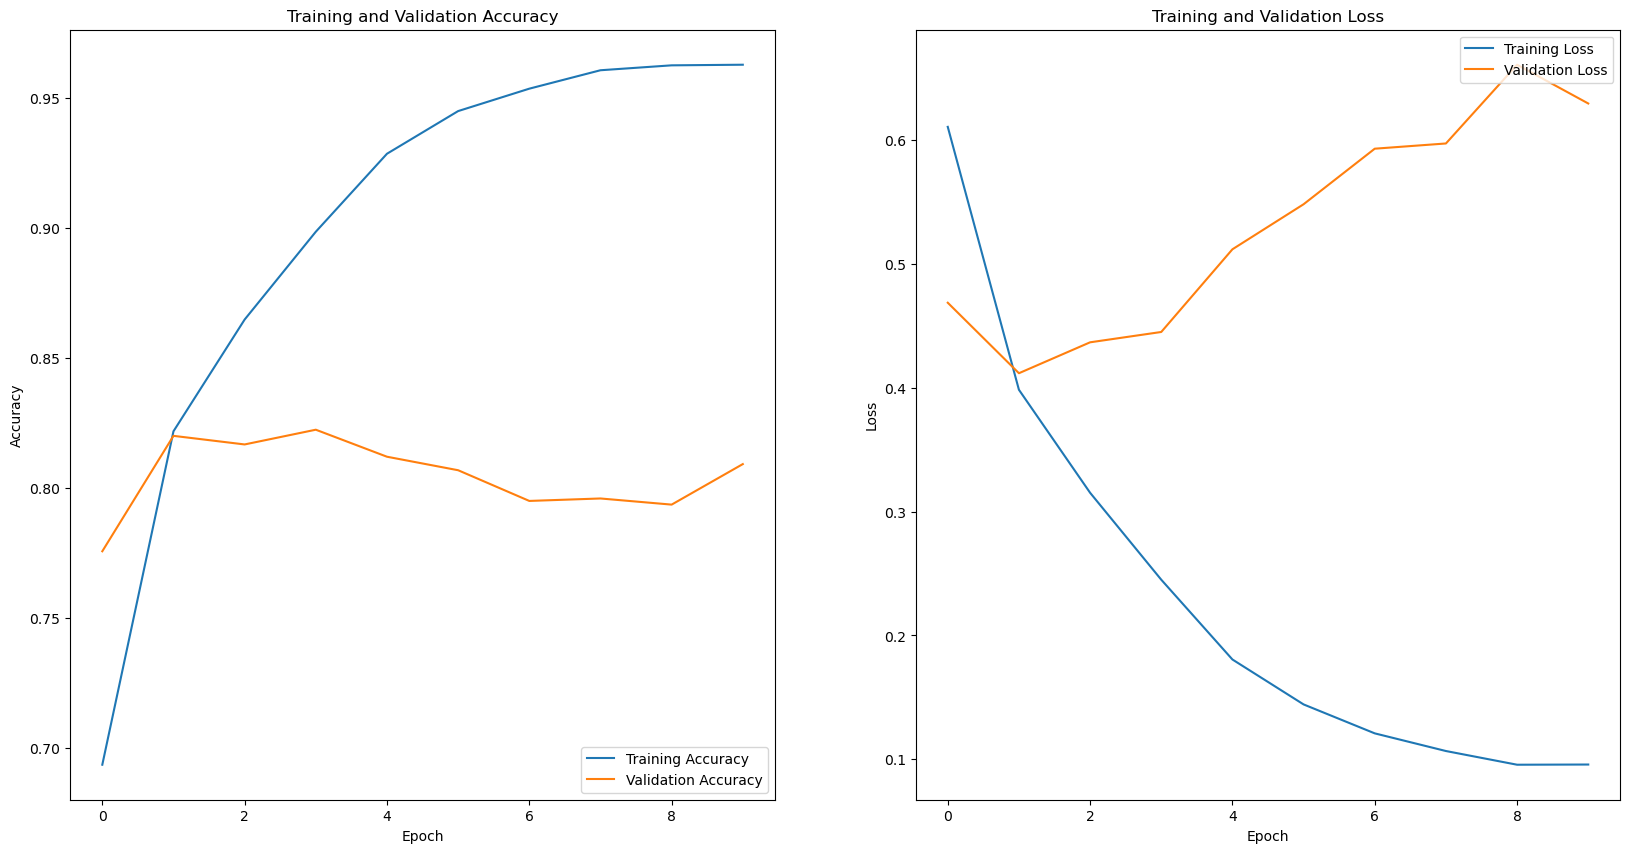

In [108]:
#visualize model performance (plots code ref from TF guide)


#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:

We only trained this model for 10 Epochs, but we can see that the model rapidly overfits despite including dropout and Batchnormalization layers designed to reduce overfitting. One potential issue that we are facing here is the size of the dataset. Because we are working with a smaller dataset, the model is iterating over the same selection of data many many times and is essentially memorizing the data set. This is we we see the training accuracy increase to nearly 100% bu the validation accuracy indicates that it does not generalize well. We can re-run this model with only two epochs to limit overfitting and save the model to try with our test data:

In [109]:
#feature dimensions for model inputs
input_shape  = X.shape[1]

#Instantiate Sequential model
CNN_model = tf.keras.Sequential()

#define the CNN model
CNN_model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(input_shape,)))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=128, activation='relu'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN_model.add(tf.keras.layers.BatchNormalization())
CNN_model.add(tf.keras.layers.Dropout(0.2))

CNN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#compile the model
CNN_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

In [110]:
#fit model for 10 epochs

epochs = 2

#save history  and fit the model to the train set and validate on the val set

history = CNN_model.fit(X_train_tensor, y_train_tensor, 
                        epochs=epochs, 
                        batch_size=32,
                        validation_data=(X_val_tensor, y_val_tensor))

Epoch 1/2
265/265 [==============================] - 2s 5ms/step - loss: 0.5964 - accuracy: 0.7010 - val_loss: 0.4733 - val_accuracy: 0.7799
Epoch 2/2
265/265 [==============================] - 1s 4ms/step - loss: 0.3869 - accuracy: 0.8277 - val_loss: 0.4257 - val_accuracy: 0.7959


### Observations:
With a training accuracy of (82%) and a validation accuracy of (79%) we can see that the model appears to not have drastically overfit yet. We were able to achieve a decent model performance, but we should also look at some other performance metrics. First lets save the model then load in the test data and see how it performs. 

In [111]:
# save the model 

#CNN_model.save('models/CNN_Baseline.h5')

In [58]:
#code to load in pre-trained model if desired:
#CNN_model = tf.keras.models.load_model('models/CNN_Baseline.h5')

In [112]:
#import data

test_df = pd.read_csv('data/test_df.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Columns: 1046 entries, user_suggestion to yu
dtypes: int64(1046)
memory usage: 9.4 MB


Lets load back in the test data and set up the model to predict on unseen data:

In [113]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

In [114]:
# convert the data to tensors

X_test_tensor = tf.convert_to_tensor(X_test)

In [115]:
#predict on the new test set
y_pred_probs = CNN_model.predict(X_test_tensor)
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # convert probabilities to class labels

# evaluate the performance against true labels

# print classification report 
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

37/37 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60       509
           1       0.00      0.00      0.00       668

    accuracy                           0.43      1177
   macro avg       0.22      0.50      0.30      1177
weighted avg       0.19      0.43      0.26      1177



### Observations 

So What is happening here? We seem to get a much lower accuracy, and a pretty terrible f1-score. On top of that, it seems as though all of the predictions are negative sentiment which we know cannot be true. If we dive a bit deeper into some of these metrics we can get a better idea of what is going on.First, lets look at our predictions with a confusion matrix which will help to further visualize what is going on:

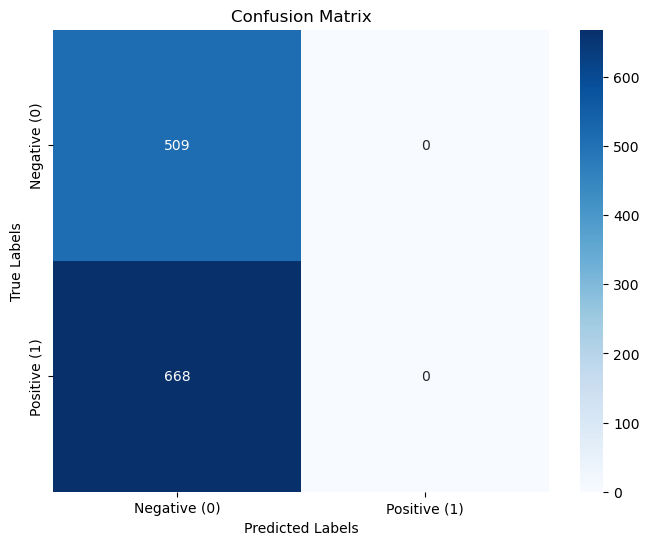

In [117]:
#create a confusion matrix
cm_df = confusion_matrix(y_test, y_pred_labels)

#define class names 
class_names = ['Negative (0)', 'Positive (1)']

#create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:

So looking at this it becomes rapidly apparent that our model is predicting every review to be a negative sentiment. This may have been cause by the slight imbalance in our data set combined with the fact that our data set is very small. 


We can look back to our previous explanation of precision/recall/and f1-scores to better understand how we can draw these conclusions and fix them:


**Our Example**


|             | precision | recall | f1-score | support |
|-------------|-----------|--------|----------|---------|
|    0        |   0.43    |  1.00  |   0.60   |   509   |
|    1        |   0.00    |  0.00  |   0.00   |   668   |
| accuracy    |           |        |   0.43   |  1177   |
| macro avg   |   0.22    |  0.50  |   0.30   |  1177   |
| weighted avg|   0.19    |  0.43  |   0.26   |  1177   |



**So given our current example we can observe the following:**

- All predictions were made to be negative and there were no positive predictions


- The precision of our our negative predictions is 0.43% accurate
    - If we remember from our EDA and data splitting, there were slightly more positive predictions than negative predictions. This value makes sense, because if all reviews are predicted negative (or positive) the accuracy should be equivalent to the ratio of the data imbalance.
    
    
- The recall is 1.00 for the negative sentiment is 1.00. this makes sense because the model is capturing all negative reviews correctly (100% of the time), but in this case it is at the cost of the models precision and overall performance because it is capturing many false negatives as well.

- The over all weighted average f1-score (which takes into account all of these values) is only 0.26 which is very poor.


**How Can we Fix this?**

We have already taken a few steps to try and address this problem via our regularization techniques including, drop out and batch normalization. Since the text data is one-hot encoded and not sequential, augmentation of the text data would not be highly effective here. In addition, while we addressed that there is a slight imbalance between positive and negative reviews, the real issue here is likely the size of the data set. So what other options are there?

One option that may assist in the models performance is adjusting the prediction threshold. Adjusting the threshold allows you to control the balance between precision and recall. This can be extremely valuable when dealing with imbalanced data. 


- Higher threshold values will make the model more conservative when making positive predictions which can increase precision and decrease recall. The model will make less positive predictions, but will reduce the chance of error in those predictions.

- Lower threshold values will allow the model to make more aggressive positive predictions but will risk more false positive as a result. This will result in a higher recall but lower precision.


Since f1-score is our best metric to assess the overall performance of the model, lets loop through a range of threshold values and choose a threshold that produces the best weighted average f1-score. We can then re-run our test data and see how this changes our predictions:




First lets re-load in the data:

In [210]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

In [211]:
# convert the data to tensors

X_test_tensor = tf.convert_to_tensor(X_test)

In [212]:
# define a range of thresholds to test
thresholds = np.arange(0.01, 0.99, 0.01)  #test thresholds from 0.1 to 0.9 in increments of 0.1

# loop through each threshold and calculate the associated weighted average f1-score

f1_scores = [] #list to store f1-score values


for threshold in thresholds:
    
    y_pred_labels = (y_pred_probs > threshold).astype(int)
    
    #ensure output is in dictionary format so the values can be accessed
    #See code below for example on how the dictionary values are stored and accessed
    classification_rep = classification_report(y_test, y_pred_labels, output_dict=True)
    
    #this pulls out the weighted avg f1-score from the dictionary created above
    f1_scores.append(classification_rep['weighted avg']['f1-score'])  


Example of the dictionary created to explain where the value comes from:

`f1_scores.append(classification_rep['weighted avg']['f1-score'])`

`{'0': {'precision': 0.4543010752688172,
  'recall': 0.9960707269155207,
  'f1-score': 0.624,
  'support': 509},
 '1': {'precision': 0.9672131147540983,
  'recall': 0.08832335329341318,
  'f1-score': 0.16186556927297668,
  'support': 668},
 'accuracy': 0.48088360237892946,
 'macro avg': {'precision': 0.7107570950114578,
  'recall': 0.5421970401044669,
  'f1-score': 0.39293278463648834,
  'support': 1177},
 'weighted avg': {'precision': 0.7454015360811943,
  'recall': 0.48088360237892946,
  ---> 'f1-score': 0.36171809708950586, <----
  'support': 1177}}`

In [213]:
#example of the dictionary created to explain where the value comes from
classification_rep

{'0': {'precision': 0.4543010752688172,
  'recall': 0.9960707269155207,
  'f1-score': 0.624,
  'support': 509},
 '1': {'precision': 0.9672131147540983,
  'recall': 0.08832335329341318,
  'f1-score': 0.16186556927297668,
  'support': 668},
 'accuracy': 0.48088360237892946,
 'macro avg': {'precision': 0.7107570950114578,
  'recall': 0.5421970401044669,
  'f1-score': 0.39293278463648834,
  'support': 1177},
 'weighted avg': {'precision': 0.7454015360811943,
  'recall': 0.48088360237892946,
  'f1-score': 0.36171809708950586,
  'support': 1177}}

Now that we have all the values stored we can plot them and determine an optimal threshold to re-reun our model predicitons with:

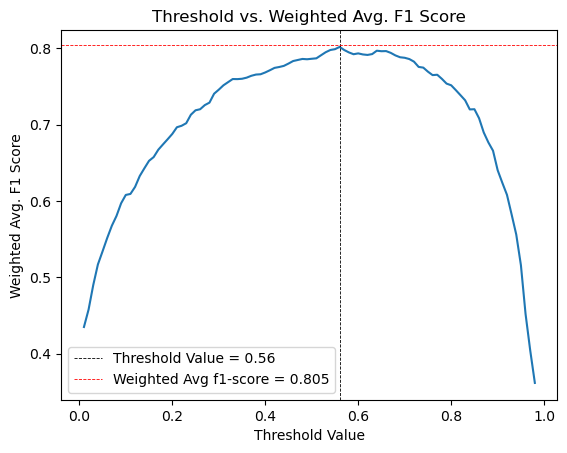

In [232]:
#plot the threshold values:

plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold Value')
plt.ylabel('Weighted Avg. F1 Score')
plt.title('Threshold vs. Weighted Avg. F1 Score')
plt.axvline(0.56, linewidth = 0.6, linestyle = '--', color = 'black', label = 'Threshold Value = 0.56')
plt.axhline(0.805, linewidth = 0.6, linestyle = '--', color = 'red', label = 'Weighted Avg f1-score = 0.805')
plt.legend()
plt.show()

### Observations:

Based on this range, it seems that the optimal range for the threshold value is between 0.5 and 0.75. There appears to be a slight peak around 0.56 as show by the vertical black line. Lets re-run our model prediction on the test set with this threshold defined and see how it alters our results:

In [59]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

In [60]:
# convert the data to tensors

X_test_tensor = tf.convert_to_tensor(X_test)

In [61]:
threshold = 0.56

# Make predictions on the new test set
y_pred_probs = CNN_model.predict(X_test_tensor)
y_pred_labels = (y_pred_probs > threshold).astype(int)  # Convert probabilities to class labels (assuming one-hot encoded)

# evaluate the performance of predictions against true labels
# Print classification report (includes precision, recall, F1-score, and more)
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred_labels)
print(classification_rep)

37/37 [==============================] - 0s 992us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       509
           1       0.80      0.87      0.83       668

    accuracy                           0.80      1177
   macro avg       0.80      0.79      0.80      1177
weighted avg       0.80      0.80      0.80      1177



### Observations:
These results look much better. Starting with the fact that the model is now predicting both positive and negative reviews. Our weighted average recall and precision are nearly perfectly balanced leading to a greatly improved weighted average f1-score of (0.80). The overall accuracy of the model Has increased as well to ~80% which rivals our previous best logistic regression model. 

We can also look at the confusion matrix again to visualize some of these results:

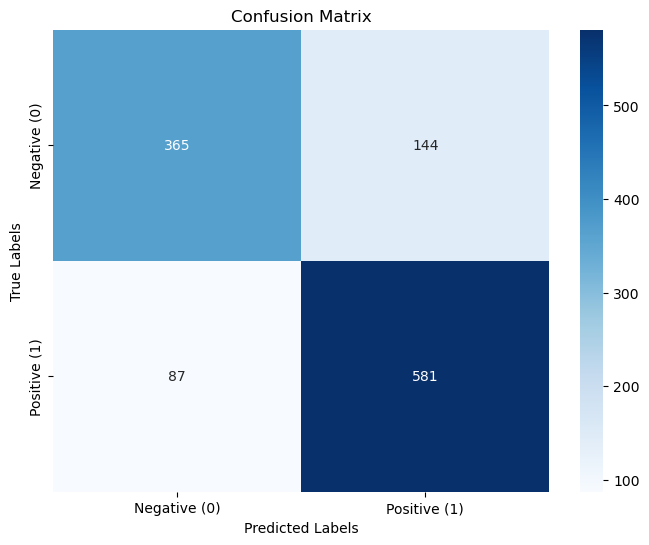

In [62]:
#create confusion matrix
cm_df = confusion_matrix(y_test, y_pred_labels)

#define class names
class_names = ['Negative (0)', 'Positive (1)']

#create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:

Again, we can see that the predictions are much more reasonable now. In fact, with the increased threshold, the positive reviews are now slightly favored by the model leading to more false positives than false negatives. In any case, this would now be a model worth working with for the problem at hand.

# Models Summary:
<a id='7'></a>
[Return to Top](#ReturntoTop)

We have now explored a few models and evaluated them with a variety of performance metrics. Some were more successful than others. Let's summarize some of the performance metrics:

In [1]:
#create lists for model names and associated permormance metrics

model_names = ['Logistic Regression', 'KNN', 'Decision Trees', 'CNN']
accuracies = [0.79, 0.57, 0.59, 0.80]
weighted_avg_f1scores = [0.78, 0.41, 0.52, 0.80]

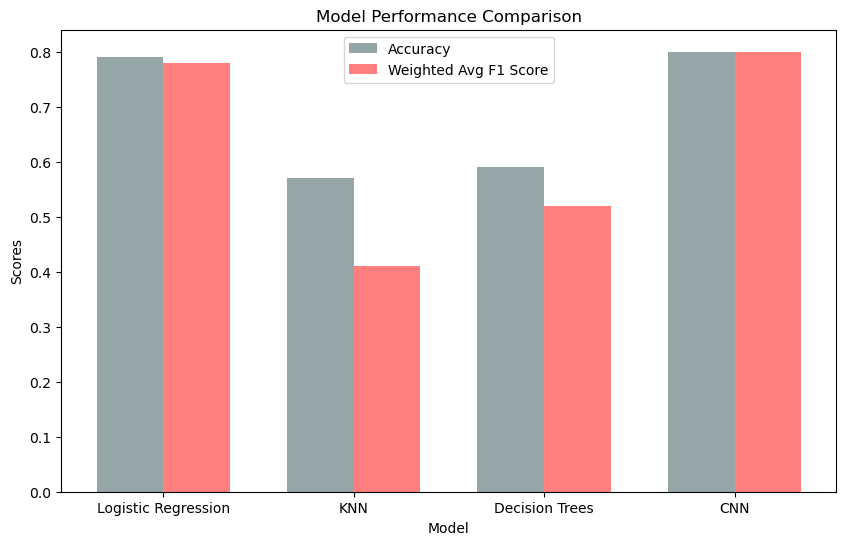

In [8]:
# set figure
fig, ax = plt.subplots(figsize=(10, 6))

# set bar width
bar_width = 0.35

#calculate the center positions of the bars
bar_positions = np.arange(len(model_names))

#plot accuracy
ax.bar(bar_positions - bar_width/2, accuracies, bar_width, color='darkslategray', alpha=0.5, label='Accuracy')

# plot weighted_avg_f1scores
ax.bar(bar_positions + bar_width/2, weighted_avg_f1scores, bar_width, color='red', alpha=0.5, label='Weighted Avg F1 Score')

#labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)
ax.legend()

plt.savefig('modelcomparison.png') 

# plot
plt.show()
 

### Observations
Nothing new is really being shown here, but this is a nice summary of the modeling we completed. As we know from the discussion on each of the models' performances, there is more than meets the eye when it comes to each option. The general take away however is that the Logistic regression and the CNN model (with an adjust threshold value for predictions) performed the best of the 4. Both the logistic model and the CNN model performed nearly identically with the testing data based on the weighted average f1-score and the prediction accuracy. The CNN model slightly out performed the Logistic regression but it was very close. 

The KNN model and Decision Tree model did not perform very well. We can remember that the accuracy here was deceptive because the models were only predicting positive sentiment. Again, this was a possible outcome from a small and slightly imbalanced data set.

Overall, given the size of the data set, the logistic regression would be my choice due to its simplicity and relatively high performance. That being said, if we were to utilize a significantly larger data set I would be interested to see how the comparison between logistic regression and CNNs changes. With a much larger data set to train on, the CNN model may become the preferred model.

------------------------------------------------------------------------------------------------------------------------------

# Summary and Next Steps:
<a id='8'></a>
[Return to Top](#ReturntoTop)

**Model Exploration we discovered the following:**
- Model accuracy can be a deceptive metric and models need to be evaluated more closely to determine actual performance
- Logistic regression and CNN model (with adjsut threshold for predictions) performed the best of the 4 models
- KNN and decision tree models struggled with the data imbalance and predicted only positive sentiment
 

**Theoretical Next Steps:**
- Test the same models on a significantly larger training set
- Explore options to balance the data set with upsampling, downsampling, ect....
- Explore more optimization with regression models to include additional regularization (L1/L2)
- explore different tokenization strategies (potentially include phrases and multiple word tokens)
    

# If you made it this far, thanks! This was a fun personal project I was excited to complete. Please reach out if you have any questions!